# 종합실습3 이변량분석(y-범주) : 직원 이직 분석

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다. 
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

# 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV'
data = pd.read_csv(path)  
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


> * 변수설명
    * Attrition	:	이직여부, Yes , No (Target)
    * Age	:	나이
    * DistanceFromHome	:	집-직장 거리(마일)
    * EmployeeNumber	:	사번
    * Gender	:	성별(Male, Female)
    * JobSatisfaction	:	직무 만족도, 다음시트 참조
    * MaritalStatus	:	결혼상태(Married, Single, Divorced)
    * MonthlyIncome	:	월급(달러)
    * OverTime	:	야근여부
    * PercentSalaryHike	:	전년대비 급여인상율(%)
    * TotalWorkingYears	:	총 근무 연수



# 2.범주-->범주

In [3]:
target = 'Attrition'

## (1) Gender --> Attrition

In [4]:
feature = 'Gender'

* 교차표

In [5]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,403,598
1,66,129


In [6]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.859275,0.822558
1,0.140725,0.177442


* 시각화

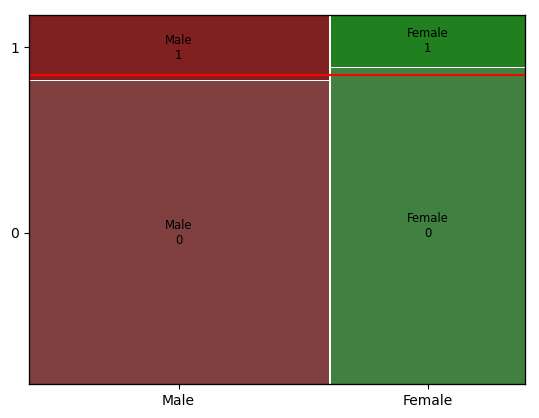

In [7]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [8]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             403   598
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 2.5537631338119975
p-value 0.1100318964829815
기대빈도
 [[392.5326087 608.4673913]
 [ 76.4673913 118.5326087]]


* 파악된 내용을 기술해 봅시다.

    관련이 적어보이지만, 도메인지식을 활용한 비즈니스적 관점에서 보면 관련있는 데이터로 보일 수 있다.    

## (2) JobSatisfaction --> Attrition

In [13]:
target = 'Attrition'

* 교차표

In [16]:
feature = 'JobSatisfaction'
display(pd.crosstab(data[target], data[feature]))
display(pd.crosstab(data[target], data[feature], normalize = 'columns'))

JobSatisfaction,1,2,3,4
Attrition,,,,
0,191,189,295,326
1,52,37,59,47


JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.786008,0.836283,0.833333,0.873995
1,0.213992,0.163717,0.166667,0.126005


* 시각화

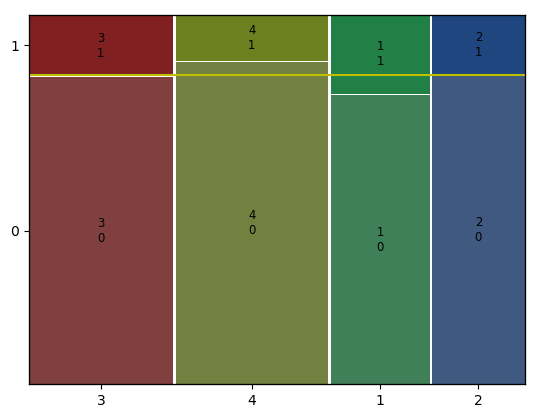

In [18]:
mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'y')
plt.show()

* 수치화 : 카이제곱검정

In [21]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('dot', result[2])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                191  189  295  326
1                 52   37   59   47
----------------------------------------------------------------------------------------------------
카이제곱통계량 8.40684948576828
p-value 0.0383107376547955
dot 3
기대빈도
 [[203.38043478 189.15217391 296.2826087  312.18478261]
 [ 39.61956522  36.84782609  57.7173913   60.81521739]]


* 파악된 내용을 기술해 봅시다.

    관련이 있어 보이지만, 수치(p_value) 상 큰 차이가 있는 것은 아니다

## (3) MaritalStatus --> Attrition

In [22]:
target = 'Attrition'

* 교차표

In [24]:
feature = 'MaritalStatus'
display(pd.crosstab(data[target], data[feature]))
display(pd.crosstab(data[target], data[feature], normalize = 'columns'))

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,241,479,281
1,23,69,103


MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.912879,0.874088,0.731771
1,0.087121,0.125912,0.268229


* 시각화

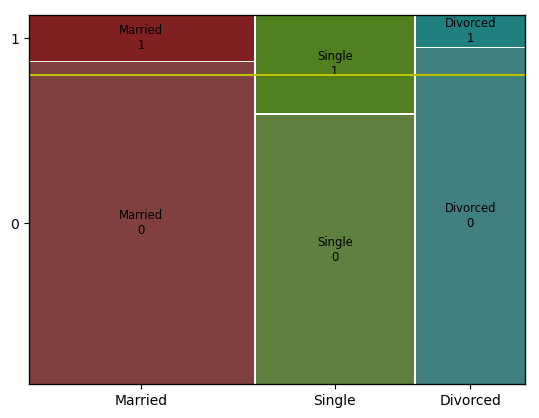

In [27]:
mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'y')
plt.show()

* 수치화 : 카이제곱검정

In [26]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('dot', result[2])
print('기대빈도\n',result[3])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   241      479     281
1                    23       69     103
----------------------------------------------------------------------------------------------------
카이제곱통계량 47.82247929575401
p-value 4.12553775054082e-11
dot 2
기대빈도
 [[220.95652174 458.65217391 321.39130435]
 [ 43.04347826  89.34782609  62.60869565]]


* 파악된 내용을 기술해 봅시다.

    결혼 여부와 이직 빈도는 상당한 관계가 있다.    

## (4) OverTime --> Attrition

In [43]:
target = 'Attrition'
feature = 'OverTime'

* 교차표

In [44]:
display(pd.crosstab(data[target], data[feature]))
display(pd.crosstab(data[target], data[feature], normalize = 'columns'))

OverTime,No,Yes
Attrition,,
0,764,237
1,90,105


OverTime,No,Yes
Attrition,,
0,0.894614,0.692982
1,0.105386,0.307018


* 시각화

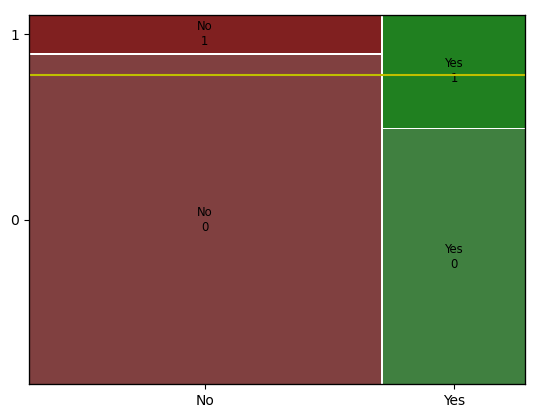

In [45]:
mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'y')
plt.show()

* 수치화 : 카이제곱검정

In [46]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('dot', result[2])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          764  237
1           90  105
----------------------------------------------------------------------------------------------------
카이제곱통계량 71.28471646317081
p-value 3.092218315896121e-17
dot 1
기대빈도
 [[714.76086957 286.23913043]
 [139.23913043  55.76086957]]


* 파악된 내용을 기술해 봅시다.

    야근 여부와 이직 여부는 관계가 있다.

# 3.숫자-->범주

## (1) Age --> Attrition

In [9]:
feature = 'Age'

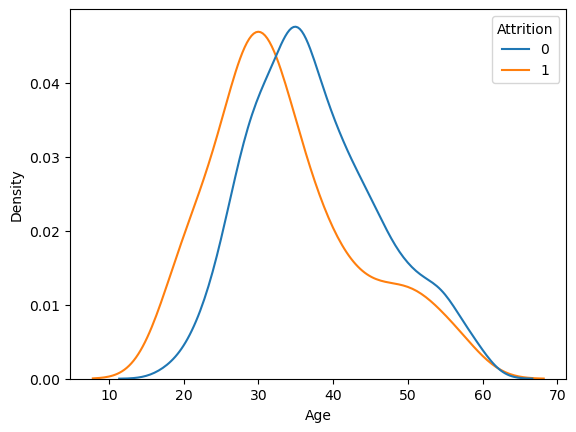

In [10]:
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.show()

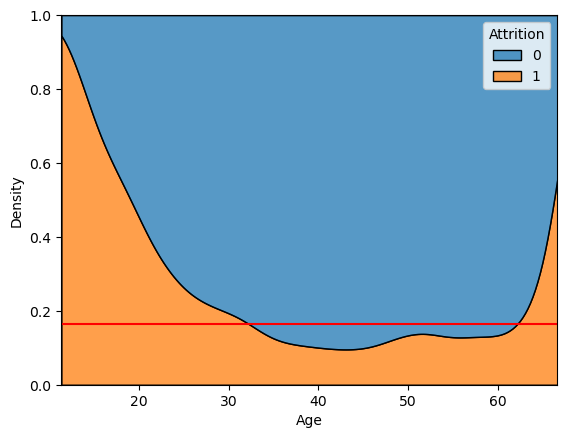

In [11]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

## (2) DistanceFromHome --> Attrition

In [28]:
target = 'Attrition'
feature = 'DistanceFromHome'

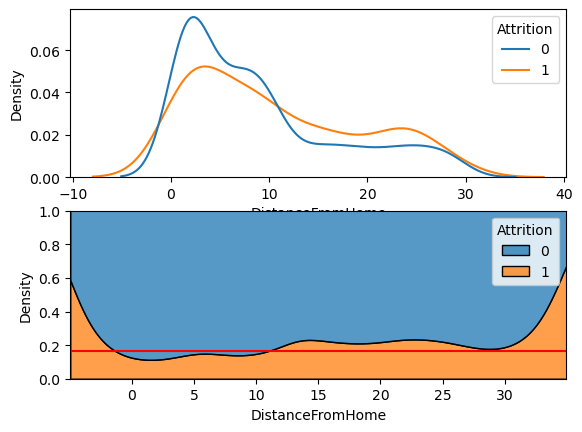

In [30]:
plt.subplot(2, 1, 1)
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.subplot(2, 1, 2)
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.show()

* 파악된 내용을 기술해 봅시다.

    직장과 집의 거리가 이직 여부와 관련이 있다.
    집이 10km 이하인 사람들은 이직 빈도가 평균 이하이고,
    그 이상인 사람들은 이직 빈도가 평균 이상이다.

## (3) MonthlyIncome --> Attrition

In [32]:
target = 'Attrition'
feature = 'MonthlyIncome'

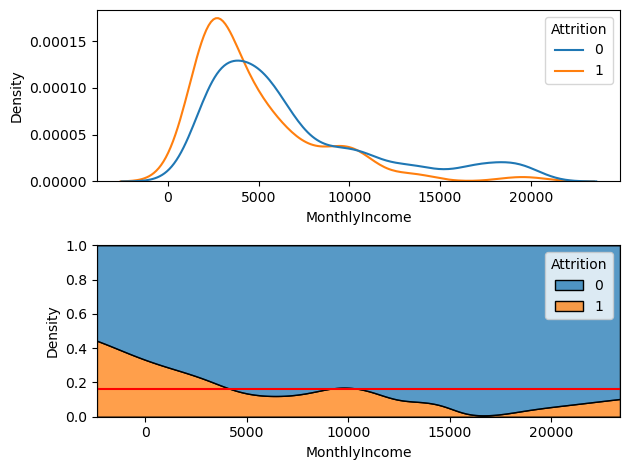

In [34]:
plt.subplot(2, 1, 1)
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.subplot(2, 1, 2)
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.tight_layout()
plt.show()

* 파악된 내용을 기술해 봅시다.

    월급 평균과 이직 빈도의 차이는 있다.
    월급 평균 10000달러 이상인 경우, 이직 빈도가 낮다.

## (4) PercentSalaryHike --> Attrition

In [35]:
target = 'Attrition'
feature = 'PercentSalaryHike'

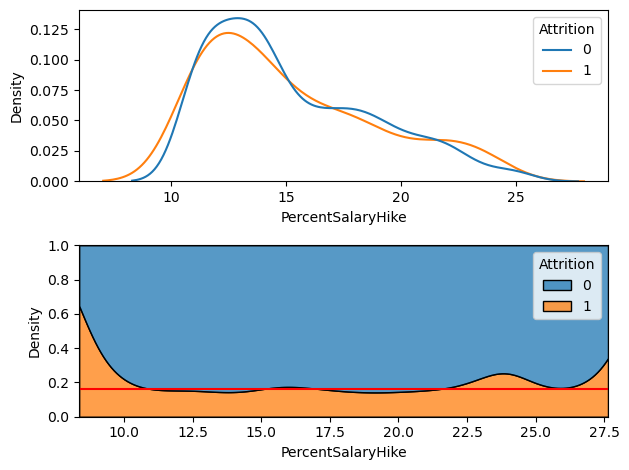

In [36]:
plt.subplot(2, 1, 1)
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.subplot(2, 1, 2)
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.tight_layout()
plt.show()

* 파악된 내용을 기술해 봅시다.

    두 데이터는 전체 평균과 유사한 선을 그리므로, 둘 사이에 관계는 크지 않다.
    임금인상률이 낮은데 이직하지 않은 사람의 상황을 더 들여다 봐야한다.
    (ex: 고액연봉자 일 수도)

## (5) TotalWorkingYears --> Attrition

In [37]:
target = 'Attrition'
feature = 'TotalWorkingYears'

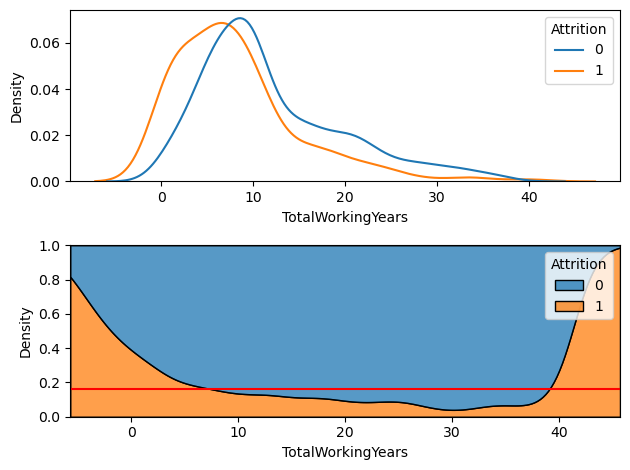

In [38]:
plt.subplot(2, 1, 1)
sns.kdeplot(x= feature, data = data, hue = target, 
            common_norm = False)
plt.subplot(2, 1, 2)
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')

plt.tight_layout()
plt.show()

* 파악된 내용을 기술해 봅시다.

    근속년수와 이직 여부와 관계가 있다.
    근속년수가 10년 이상인 시점부터 지속적으로 이직 빈도가 줄어든다.

# 4.관계 정리하기

① 강한관계

    MaritalStatus
    OverTime
    Age
    DistanceFromHome
    MonthlyIncome
    TotalWorkingyear

② 중간관계

    JobStisfaction


③ 관계없음

    Sex
    PercentSalaryHike